In [1]:
import numpy
import numpy.random
import pandas
import pylab
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
%matplotlib inline

datapath = '../../../data/'
processed_data_regular_season = datapath + 'processed/RegularSeasonTeamStats/'
processed_data_extra = datapath + 'processed/RegularSeasonExtraStats/'


"""
http://glowingpython.blogspot.com/2012/10/visualizing-correlation-matrices.html
"""
def plot_covariance(X, features_named):
    R = numpy.corrcoef(X.transpose())
    plt.figure(figsize=(16, 9))
    plt.pcolor(abs(R)) # take abs to get magnitued (don't care about negativity)
    #plt.matshow(R)
    plt.colorbar()
    pos = numpy.arange(len(X.columns)) + .5
    plt.yticks(pos, features_named)
    plt.xticks(pos, features_named, rotation=90)
    

# Covariance Matrix Visualization
## Kaggle Only

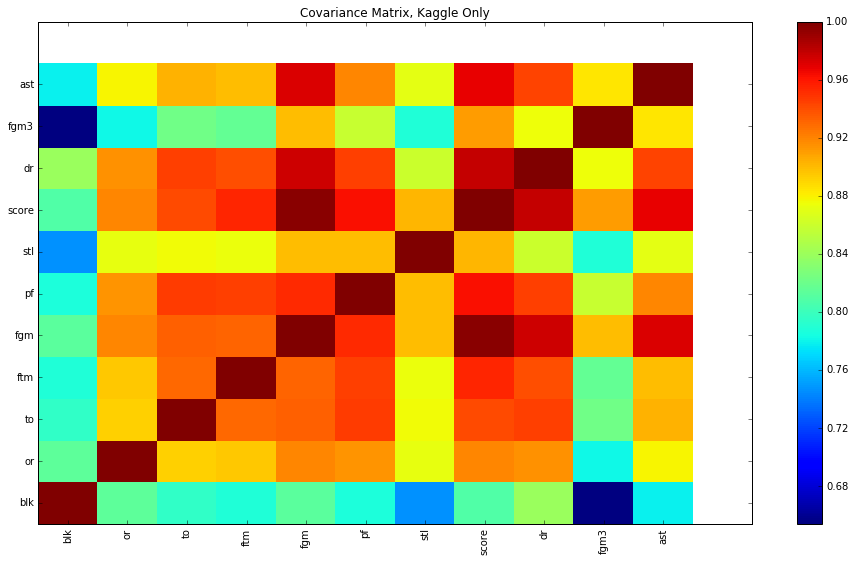

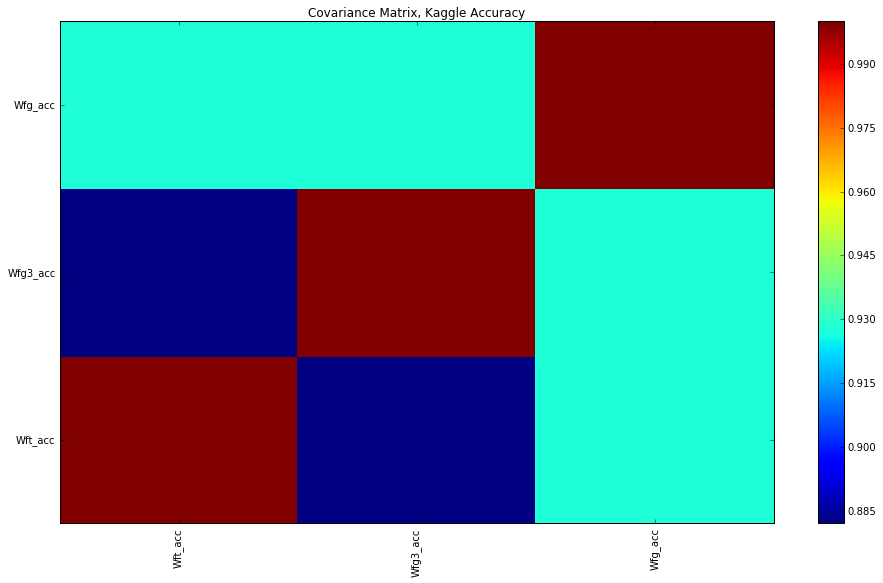

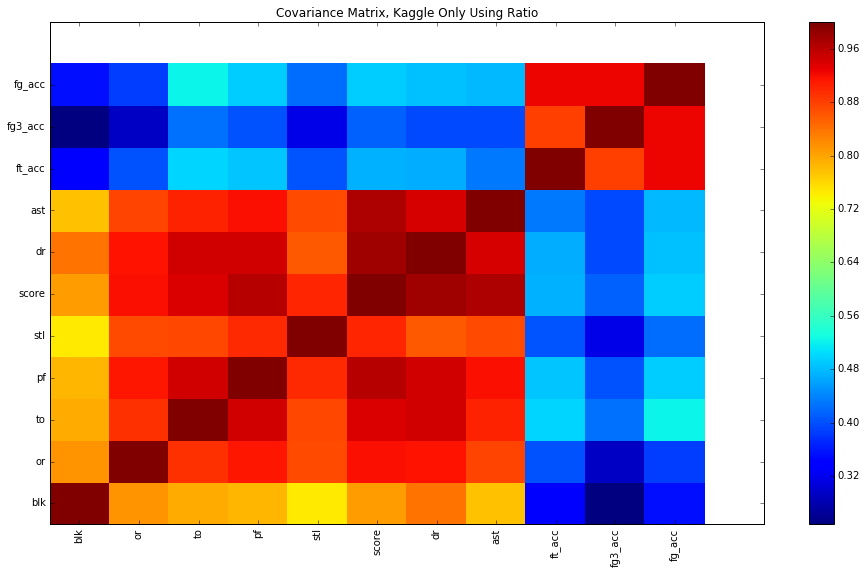

In [2]:
DetailedStats = pandas.read_csv(processed_data_regular_season + 'RegularSeasonDetailedTeamStats2015.csv')
AccuracyStats = pandas.read_csv(processed_data_extra + 'RegularSeasonAccuracyStats2015.csv') 

all_detailed_features = ['WblkAvg', 'LblkAvg', 'WorAvg', 'LfgaAvg', 'WtoAvg', 'LpfAvg', 'LtoAvg', 'LscoreAvg', 'LfgmAvg', 
'WftmAvg', 'LstlAvg', 'WfgmAvg', 'Wfga3Avg', 'WftaAvg', 'WpfAvg', 'Lfgm3Avg', 'LftaAvg', 'WfgaAvg', 'LdrAvg', 'WstlAvg', 
            'WscoreAvg', 'WdrAvg', 'LorAvg', 'LftmAvg', 'Lfga3Avg', 'Team_Name', 'GameCount', 'Wfgm3Avg', 'WastAvg', 'LastAvg']
avg_features = ['WblkAvg', 'WorAvg', 'WtoAvg', 'WftmAvg', 'WfgmAvg', 'Wfga3Avg', 'WftaAvg', 'WpfAvg', 'WfgaAvg', 'WstlAvg', 
            'WscoreAvg', 'WdrAvg', 'Wfgm3Avg', 'WastAvg']
avg_features = ['WblkAvg', 'WorAvg', 'WtoAvg', 'WftmAvg', 'WfgmAvg', 'WpfAvg', 'WstlAvg', 'WscoreAvg', 'WdrAvg', 'Wfgm3Avg', 
                'WastAvg']
acc_features = ['Wft_acc', 'Wfg3_acc','Wfg_acc']
features_named = [x.replace('W', '').replace('Avg', '') for x in (avg_features + acc_features)]

"""    
wfgm - field goals made
wfga - field goals attempted
wfgm3 - three pointers made
wfga3 - three pointers attempted
wftm - free throws made
wfta - free throws attempted
wor - offensive rebounds
wdr - defensive rebounds
wast - assists
wto - turnovers
wstl - steals
wblk - blocks
wpf - personal fouls
"""

X = DetailedStats[avg_features]
# X['WftrAvg'] = X['WftaAvg'] / X['WftmAvg']
# X['Wfg3rAvg'] = X['Wfga3Avg'] / X['Wfgm3Avg']
# X['WfgrAvg'] = X['WfgaAvg'] / X['WfgmAvg']
# X = X.drop(['WftmAvg', 'Wfgm3Avg', 'WfgmAvg'], axis=1)
plot_covariance(X, features_named)
plt.title('Covariance Matrix, Kaggle Only')

X = AccuracyStats[acc_features]
plot_covariance(X, acc_features)
plt.title('Covariance Matrix, Kaggle Accuracy')


avg_features = ['WblkAvg', 'WorAvg', 'WtoAvg', 'WpfAvg', 'WstlAvg', 'WscoreAvg', 'WdrAvg', 'WastAvg']
features_named = [x.replace('W', '').replace('Avg', '') for x in (avg_features + acc_features)]
X = pandas.concat([DetailedStats[avg_features], AccuracyStats[acc_features]], axis=1)
X = X.dropna(axis='index', how='any')
plot_covariance(X, features_named)
plt.title('Covariance Matrix, Kaggle Only Using Ratio')

* fgm - field goals made
* fga - field goals attempted
* fgm3 - three pointers made
* fga3 - three pointers attempted
* ftm - free throws made
* fta - free throws attempted
* or - offensive rebounds
* dr - defensive rebounds
* ast - assists
* to - turnovers
* stl - steals
* blk - blocks
* pf - personal fouls

# Covariance Matrix Visualization
## Kenpom Only, With Rank

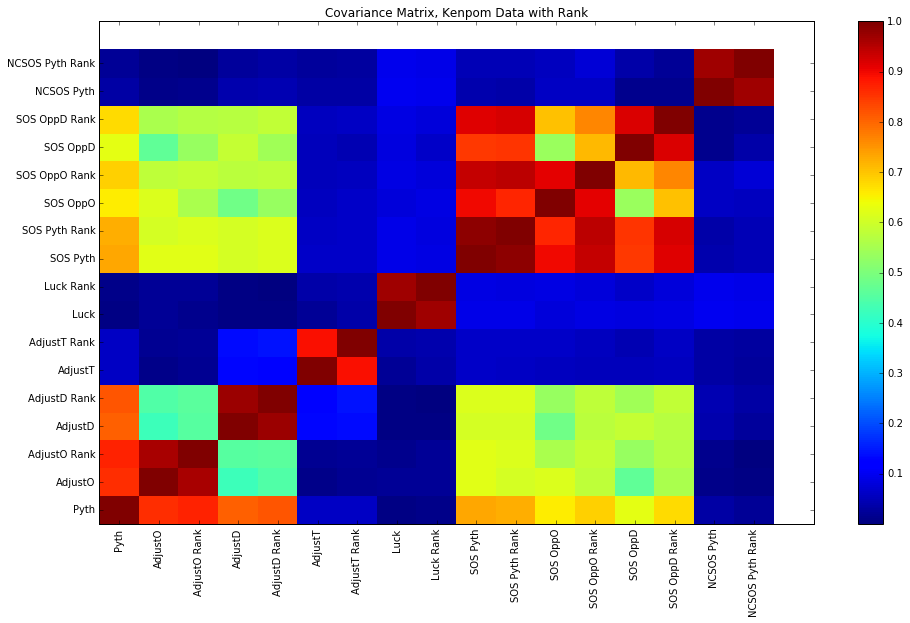

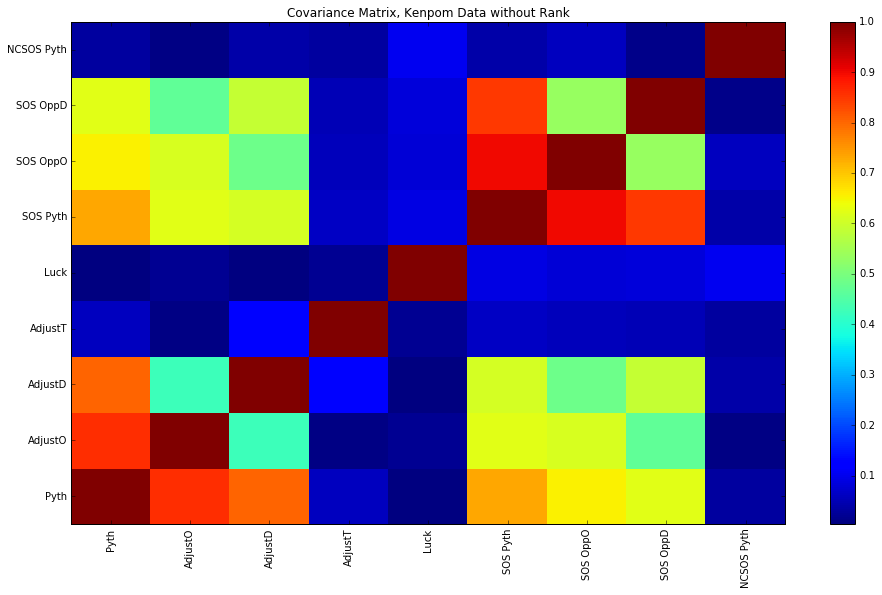

In [3]:
Kenpom = pandas.read_csv(datapath + 'kenpom.csv')

# With Rank
kp_features_rank = ['Pyth', 'AdjustO', 'AdjustO Rank', 'AdjustD', 'AdjustD Rank', 'AdjustT', 'AdjustT Rank', 'Luck', 'Luck Rank', 
    'SOS Pyth', 'SOS Pyth Rank', 'SOS OppO', 'SOS OppO Rank', 'SOS OppD', 'SOS OppD Rank', 'NCSOS Pyth', 'NCSOS Pyth Rank']
features_named = [x for x in kp_features_rank]
X = Kenpom[kp_features_rank]
plot_covariance(X, features_named)
plt.title('Covariance Matrix, Kenpom Data with Rank')

# Without Rank

kp_features_norank = ['Pyth', 'AdjustO', 'AdjustD', 'AdjustT', 'Luck', 'SOS Pyth', 'SOS OppO', 'SOS OppD', 'NCSOS Pyth']
features_named = [x for x in kp_features_norank]
X = Kenpom[kp_features_norank]
plot_covariance(X, features_named)
plt.title('Covariance Matrix, Kenpom Data without Rank')

# Covariance Matrix Visualization
## Kenpom and Kaggle

    WblkAvg    WorAvg    WtoAvg   WftmAvg    WfgmAvg   Wfga3Avg    WftaAvg  \
0  0.250000  2.035714  3.321429  3.428571   6.750000   5.178571   4.357143   
1  1.000000  3.655172  4.551724  5.413793  10.000000   8.620690   7.689655   
2  2.970588  6.441176  6.970588  7.852941  13.764706  16.058824  12.000000   
3  2.290323  5.258065  6.483871  9.451613  12.193548  11.322581  12.806452   
4  0.464286  3.571429  3.214286  4.964286   6.857143   5.321429   7.428571   

      WpfAvg    WfgaAvg   WstlAvg     ...       WastAvg    Pyth  AdjustO  \
0   5.071429  13.250000  1.571429     ...      3.928571  0.9689    117.7   
1   6.758621  20.034483  2.551724     ...      7.413793  0.9551    117.5   
2  10.529412  31.970588  3.735294     ...      7.794118  0.9508    115.8   
3   9.516129  27.322581  3.903226     ...      6.096774  0.9482    116.0   
4   4.642857  15.607143  1.571429     ...      4.000000  0.9352    112.7   

   AdjustD  AdjustT   Luck  SOS Pyth  SOS OppO  SOS OppD  NCSOS Pyth  
0  

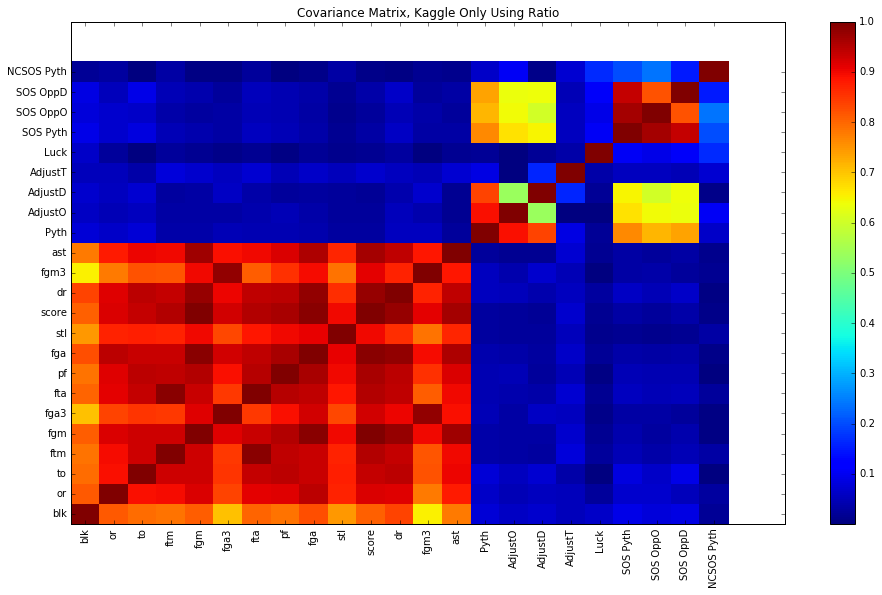

In [4]:
avg_features = ['WblkAvg', 'WorAvg', 'WtoAvg', 'WftmAvg', 'WfgmAvg', 'Wfga3Avg', 'WftaAvg', 'WpfAvg', 'WfgaAvg', 'WstlAvg', 
            'WscoreAvg', 'WdrAvg', 'Wfgm3Avg', 'WastAvg']

X = pandas.concat([DetailedStats[avg_features], Kenpom[kp_features_norank]], axis=1)
X = X.dropna(axis='index', how='any')
print(X.head())
features_named = [x.replace('W', '').replace('Avg', '') for x in (avg_features + kp_features_norank)]
plot_covariance(X, features_named)
plt.title('Covariance Matrix, Kaggle Only Using Ratio')